In [ ]:
!pip install ipympl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.8 MB/s eta 0:00:00


<figure>
  <IMG SRC="https://raw.githubusercontent.com/fmeer/public-files/main/TUlogo.png" WIDTH=150 ALIGN="right">
</figure>

# CEGM2003 project: Bayesian optimization for truss structures
    
In this notebook, the finite element code `pyJive` is applied to frequency analysis of a truss structure. Specifically, the `ModeShapeModule` is used to compute the natural frequencies of a 37-bar truss bridge structure. The case has been investigated in literature with multiple optimization algorithms, see [Kanarachos et al., 2017](https://dx.doi.org/10.1016/j.compstruc.2016.11.005) for a description of the case and a comparison of the performance of diffferent optimization methods.
    
Below, the truss is first analyzed with the default settings and then with the optimal parameters from Kanarachos. The notebook demonstrates how to run the finite element program and how to change those inputs that define the design space for the optimization problem.

In [ ]:
# Connect to Google Colab
from google.colab import drive
from google.colab import output

# This will prompt for authorization to access your Google Drive from Colab.
drive.mount('/content/drive', force_remount=True)

# After mounting, you can navigate to a specific folder using the usual UNIX cd command.
# Replace 'your_folder_path' with the actual path of your folder inside Google Drive.
folder_path = '/content/drive/MyDrive/Colab Notebooks/Truss_project'
package_path = '/content/drive/MyDrive/Colab Notebooks/Truss_project/pyJive'
truss_path = '/content/drive/MyDrive/Colab Notebooks/Truss_project/truss_bridge'

# Support third party widgets
output.enable_custom_widget_manager()

Mounted at /content/drive


In [ ]:
%cd "$package_path"

import numpy as np
from utils import proputils as pu
import main
from names import GlobNames as gn
import pandas as pd
import math
import matplotlib.pyplot as plt

%matplotlib widget

/content/drive/MyDrive/Colab Notebooks/Truss_project/pyJive


### Starting design

The analysis is based on two input files. The main input file, `bridge_frequency.pro` contains all input parameters and other settings of the analysis. It also refers to a second file `bridge.geom`, which defines the geometry and mesh. The initial input matches the starting point of the optimization procedure following Kanarachos.

/content/drive/MyDrive/Colab Notebooks/Truss_project/truss_bridge
Initializing module chain...
InitModule: Creating DofSpace...
InitModule: Reading geo mesh file bridge.geom ...
InitModule: Creating node groups...
InitModule: Created group bl with nodes [0]
InitModule: Created group br with nodes [19]
InitModule: Created group bm with nodes [9]
InitModule: Created group bottom with nodes [ 0  1  3  5  7  9 11 13 15 17 19]
InitModule: Creating model...
Creating Line2Shape...
mass  using all doftypes by default:  dict_keys(['dx', 'dy'])
Running chain...
ModeShapeModule: running eigenvalue problem...
ModeShapeModule: smallest natural frequency  5.5961e+01 rad / s


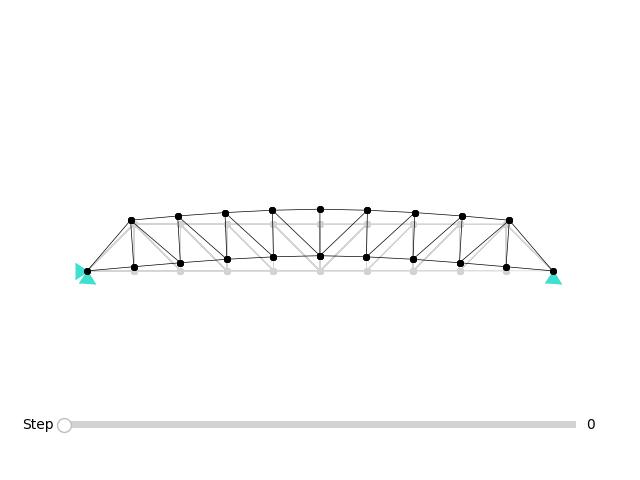

End of execution
Smallest three natural frequencies:  [ 8.90649126 29.59101061 50.01221715]  Hz


In [ ]:
%cd "$truss_path"

# Read the input file and store in props object
props = pu.parse_file('bridge_frequency.pro')

# Call the program and store output in globdat
globdat = main.jive(props)

# Write additional output
print('Smallest three natural frequencies: ', globdat[gn.EIGENFREQS][0:3]/2/np.pi, ' Hz')

### Optimal design from Kanarachos

Now, two changes are made to the problem settings to make the analysis match the optimum solution of Kanarachos. The `props` object, which contains the information from `bridge.pro` in the form of a nested `dict` is overwritten at two of its entries.
- **Cross sectional areas:** these are defined in `props['model']['truss']['area']`
- **Truss geometry:** for this a separate `.geom` file has already been prepared and the program is told to use this one by overwriting the entry `props['init']['mesh']['file']`. Check the differences between the two `.geom`-files in this folder to see how the geometry is updated.

In [ ]:
# Overwrite relevant inputs
props['model']['truss']['area'] = [40e-4, 3.1997e-4, 1.0025e-4, 1.0000e-4, 2.5875e-4, 1.0895e-4, 1.1261e-4, 2.5624e-4, 1.4121e-4, 1.5758e-4, 2.2461e-4, 1.0694e-4, 1.3193e-4, 2.3846e-4, 1.0001e-4 ]
props['init']['mesh']['file'] = 'bridge.geom'

# Call program with updated inputs
globdat = main.jive(props)
print('Smallest three natural frequencies: ', globdat[gn.EIGENFREQS][0:3]/2/np.pi, ' Hz')

Initializing module chain...
InitModule: Creating DofSpace...
InitModule: Reading geo mesh file bridge.geom ...
InitModule: Creating node groups...
InitModule: Created group bl with nodes [0]
InitModule: Created group br with nodes [19]
InitModule: Created group bm with nodes [9]
InitModule: Created group bottom with nodes [ 0  1  3  5  7  9 11 13 15 17 19]
InitModule: Creating model...
Creating Line2Shape...
mass  using all doftypes by default:  dict_keys(['dx', 'dy'])
Running chain...
ModeShapeModule: running eigenvalue problem...
ModeShapeModule: smallest natural frequency  7.9021e+01 rad / s


End of execution
Smallest three natural frequencies:  [12.57657229 38.75169328 65.02033808]  Hz


In [ ]:
class geometry():
    def __init__(self):
        %cd "$truss_path"

        n_nodes = np.linspace(0, 19, 20)
        xy_nodes = [[0, 0],
             [1, 0],
             [1, 1],
             [2, 0],
             [2, 1],
             [3, 0],
             [3, 1],
             [4, 0],
             [4, 1],
             [5, 0],
             [5, 1],
             [6, 0],
             [6, 1],
             [7, 0],
             [7, 1],
             [8, 0],
             [8, 1],
             [9, 0],
             [9, 1],
             [10, 0]]

        nodes_members = [[0, 1, 1, 0],
                 [0, 2, 1, 1],
                 [1, 2, 1, 2],
                 [2, 3, 1, 3],
                 [2, 4, 1, 4],
                 [3, 4, 1, 5],
                 [4, 5, 1, 6],
                 [4, 6, 1, 7],
                 [5, 6, 1, 8],
                 [6, 7, 1, 9],
                 [6, 8, 1, 10],
                 [7, 8, 1, 11],
                 [8, 9, 1, 12],
                 [9, 12, 1, 12],
                 [8, 10, 1, 13],
                 [9, 10, 1, 14],
                 [10, 12, 1, 13],
                 [11, 12, 1, 11],
                 [12, 14, 1, 10],
                 [11, 14, 1, 9],
                 [13, 14, 1, 8],
                 [14, 16, 1, 7],
                 [13, 16, 1, 6],
                 [15, 16, 1, 5],
                 [16, 18, 1, 4],
                 [15, 18, 1, 3],
                 [17, 18, 1, 2],
                 [18, 19, 1, 1],
                 [1, 3, 1, 0],
                 [3, 5, 1, 0],
                 [5, 7, 1, 0],
                 [7, 9, 1, 0],
                 [9, 11, 1, 0],
                 [11, 13, 1, 0],
                 [13, 15, 1, 0],
                 [15, 17, 1, 0],
                 [17, 19, 1, 0]]

        self.nodes = pd.DataFrame(data=[[float(i) for i in j] for j in xy_nodes], index=map(int, n_nodes), columns=["x", "y"])
        self.members = pd.DataFrame(data=nodes_members, columns=["Node 1", "Node 2", "no element", "crosssection"])
        self.density = float(props["model"]["truss"]["density"])
        self.props = pu.parse_file('bridge_frequency.pro')
        self.geomfile = "bridge_test.geom"

        self.props['init']['mesh']['file'] = self.geomfile
        self.FrequencyRequirements = [20, 40, 60] #Hz

    def rewrite_file(self):
        with open(self.geomfile, "w") as file:
            file.write('node: node #, x-coordinate; y-coordinate \n')
            file.write(self.nodes.to_csv(index=True, sep=' ', header=False))
            file.write('\n')
            file.write('member: Node #1; Node #2; number of elements; cross-section type \n')
            file.write(self.members.to_csv(index=False, sep=' ', header=False))

    def update_nodes(self, new_y, returns=False):

        if len(new_y) != 5:
            raise Exception("Length of new y vector not equal to 5")

        for i in range(5):
            self.nodes.loc[i * 2 + 2]["y"] = new_y[i]
            self.nodes.loc[20 - (i * 2 + 2)]["y"] = new_y[i]

        if returns == True:
            geometry.display_nodes(self)

    def update_areas(self, new_areas, returns=False):

        if len(new_areas) != 15:
            raise Exception("Length of new areas vector not equal to 15")

        self.props['model']['truss']['area'] = new_areas

        if returns == True:
            geometry.print_areas(self)

    def compute_mass(self, returns=False):
        n = len(self.members)
        dist = np.zeros(n)
        mass = np.zeros(n)

        if type(self.props["model"]["truss"]["area"]) == str:
            area = list(self.props["model"]["truss"]["area"][1:-1].split(","))
            area = [float(i) for i in area]
        else:
            area = self.props["model"]["truss"]["area"]

        for i in range(n):
            node1 = self.members.loc[i]["Node 1"]
            node2 = self.members.loc[i]["Node 2"]
            cs = int(self.members.loc[i]["crosssection"])

            x1 = self.nodes.loc[node1]["x"]
            y1 = self.nodes.loc[node1]["y"]

            x2 = self.nodes.loc[node2]["x"]
            y2 = self.nodes.loc[node2]["y"]

            dist[i] = np.round(np.sqrt((x1 - x2)**2 + (y1 - y2)**2), 2)
            mass[i] = np.round(area[cs] * self.density * dist[i], 2)

        self.dist = dist
        self.mass = mass.sum()

        if returns == True:
            geometry.print_mass(self)

    def run_FEM(self, check=False, returns=False):
        geometry.rewrite_file(self)
        globdat = main.jive(self.props)
        self.EigenFrequencies = globdat[gn.EIGENFREQS][0:3]/2/np.pi

        geometry.print_frequencies(self)

        if check==True:
            geometry.check_eigenfrequencies(self)

        if returns==True:
            return self.EigenFrequencies

    def check_eigenfrequencies(self):
        if np.sum(self.EigenFrequencies > self.FrequencyRequirements) == 3:
            self.requirements = True
        else:
            self.requirements = False

    def display_nodes(self):
        display(self.nodes)

    def display_members(self):
        display(self.members)

    def print_areas(self):
        print(props['model']['truss']['area'])

    def print_mass(self):
        print(f"the total mass of the structure is {self.mass:.3f} kg")

    def print_distance(self):
        print(self.dist)

    def print_frequencies(self):
        print(f'Smallest three natural frequencies: {self.EigenFrequencies} Hz')

    def return_frequencies(self):
        return self.EigenFreqs

    def plot_structure(self):
        plt.figure(figsize=(12,4))

        for i in range(len(self.members)):
            node1 = self.members.loc[i]["Node 1"]
            node2 = self.members.loc[i]["Node 2"]

            x1 = self.nodes.loc[node1]["x"]
            y1 = self.nodes.loc[node1]["y"]

            x2 = self.nodes.loc[node2]["x"]
            y2 = self.nodes.loc[node2]["y"]
            plt.plot([x1, x2], [y1, y2], "b-")

        for i in range(len(self.nodes)):
            plt.plot(self.nodes.loc[i]["x"], self.nodes.loc[i]["y"], "ro")
            plt.annotate(i, (self.nodes.loc[i]["x"] + 0.1, self.nodes.loc[i]["y"]))

        plt.axis("scaled")
        plt.axis("off")
        plt.show()

/content/drive/MyDrive/Colab Notebooks/Truss_project/truss_bridge
the total mass of the structure is 288.920 kg


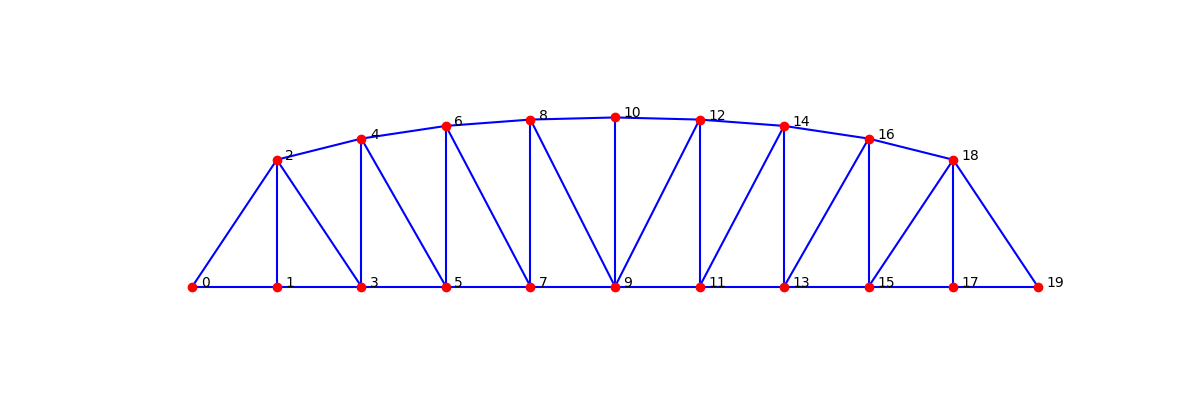

Initializing module chain...
InitModule: Creating DofSpace...
InitModule: Reading geo mesh file bridge_test.geom ...
InitModule: Creating node groups...
InitModule: Created group bl with nodes [0]
InitModule: Created group br with nodes [19]
InitModule: Created group bm with nodes [9]
InitModule: Created group bottom with nodes [ 0  1  3  5  7  9 11 13 15 17 19]
InitModule: Creating model...
Creating Line2Shape...
mass  using all doftypes by default:  dict_keys(['dx', 'dy'])
Running chain...
ModeShapeModule: running eigenvalue problem...
ModeShapeModule: smallest natural frequency  1.4032e+02 rad / s


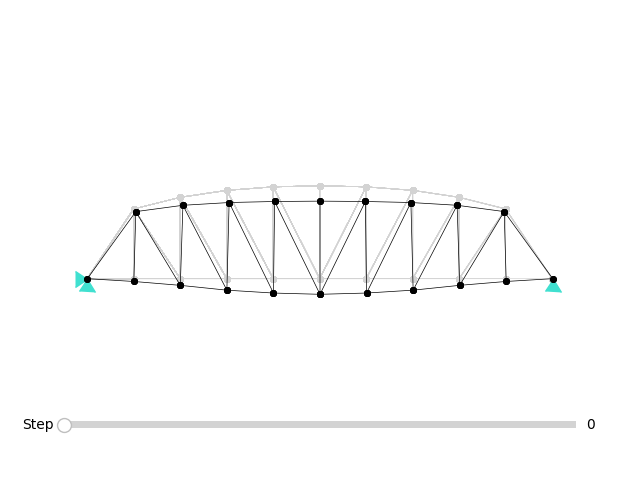

End of execution
Smallest three natural frequencies: [22.33227159 44.11637917 67.44162399] Hz


In [ ]:
geom = geometry()
geom.update_nodes([1.5, 1.75, 1.9, 1.975, 2.0])
geom.update_areas([30e-4, 3.1997e-4, 1.0025e-4, 1.0000e-4, 2.5875e-4, 1.0895e-4, 1.1261e-4, 2.5624e-4, 1.4121e-4, 1.5758e-4, 2.2461e-4, 1.0694e-4, 1.3193e-4, 2.3846e-4, 1.0001e-4 ])
geom.compute_mass(returns=True)
geom.plot_structure()
freqs = geom.run_FEM(check=True, returns=True)